In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import model_selection, svm
from sklearn.model_selection import train_test_split

In [24]:
train = pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv',encoding='latin-1')

In [25]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [26]:
train['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [27]:
test = pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv',encoding='latin-1')

In [28]:
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [29]:
def Combined(df1,df2):
    final_df = pd.concat([df1, df2], axis = 0)
    final_df = final_df.drop(['UserName', 'ScreenName', 'Location', 'TweetAt'], axis = 1)
    final_df['Sentiment'] = final_df['Sentiment'].replace({'Extremely Positive' : 'Positive','Extremely Negative' : 'Negative' })
    final_df['Sentiment'] = final_df['Sentiment'].replace({'Positive' : 0, 'Negative' : 1, 'Neutral' : 2})
    return final_df

In [30]:
data = Combined(train, test)
data.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,2
1,advice Talk to your neighbours family to excha...,0
2,Coronavirus Australia: Woolworths to give elde...,0
3,My food stock is not the only one which is emp...,0
4,"Me, ready to go at supermarket during the #COV...",1


In [31]:
data.shape

(44955, 2)

In [32]:
data.isna().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [33]:
data.duplicated().any()

False

# Most Common Words

In [34]:
most_common = Counter(''.join(data['OriginalTweet'].str.lower()).split()).most_common(100)
most_common

[('the', 46834),
 ('to', 41628),
 ('and', 26173),
 ('of', 23449),
 ('a', 20396),
 ('in', 20104),
 ('for', 15065),
 ('#coronavirus', 13364),
 ('is', 13230),
 ('are', 12208),
 ('on', 10064),
 ('you', 9476),
 ('at', 8429),
 ('i', 8366),
 ('this', 7628),
 ('with', 6801),
 ('prices', 6781),
 ('that', 6729),
 ('have', 6714),
 ('food', 6709),
 ('grocery', 6561),
 ('be', 6288),
 ('store', 6238),
 ('we', 6093),
 ('as', 6069),
 ('supermarket', 5873),
 ('from', 5543),
 ('people', 5486),
 ('covid-19', 5452),
 ('it', 5249),
 ('your', 5087),
 ('all', 5004),
 ('will', 4893),
 ('not', 4796),
 ('#covid19', 4405),
 ('my', 4252),
 ('or', 4196),
 ('our', 4160),
 ('they', 4129),
 ('&amp;', 4088),
 ('up', 4066),
 ('consumer', 4059),
 ('has', 4037),
 ('by', 3923),
 ('can', 3872),
 ('but', 3816),
 ('out', 3808),
 ('their', 3519),
 ('#covid_19', 3476),
 ('more', 3429),
 ('if', 3306),
 ('online', 3258),
 ('during', 3214),
 ('shopping', 3199),
 ('about', 3133),
 ('get', 3121),
 ('no', 3062),
 ('how', 3040),
 ('s

# Least Common words

In [35]:
least_common = Counter(''.join(data['OriginalTweet'].str.lower()).split()).most_common()[-100 : ]
least_common

[('#coronavirusstaying', 1),
 ('https://t.co/iadgpkwumc', 1),
 ('#shoppingla', 1),
 ('ktla', 1),
 ('https://t.co/ibc9yo2wsd@asdaserviceteam', 1),
 ('â\x91rogerâ\x92', 1),
 ('#littlethingsno', 1),
 ("joe's;", 1),
 ('before-work', 1),
 ('#bayareawonder', 1),
 ('clan.', 1),
 ('heap', 1),
 ('suffer.my', 1),
 ('today...he', 1),
 ('#coronavirusrough', 1),
 ('heros:', 1),
 ("'thank", 1),
 ("service'", 1),
 ('https://t.co/roxpx43t5hcoronavirus', 1),
 ('â\x93peopleâ\x92s', 1),
 ('vaccineâ\x94', 1),
 ('https://t.co/thpraqfbpc', 1),
 ('https://t.co/yjphzuyuwfdue', 1),
 ('boxâ', 1),
 ('https://t.co/psqudqnbqjpsa:', 1),
 ('malaria!when', 1),
 ('george..', 1),
 ('https://t.co/jzsiy4wd49due', 1),
 ('https://t.co/awnyawa0fi', 1),
 ('https://t.co/jwkirn8okvrewe', 1),
 ('mitarbeiter:', 1),
 ('â\x84nur', 1),
 ('packung', 1),
 ('nase.â\x93', 1),
 ('voldemort', 1),
 ('verlã¤sst', 1),
 ('traurig', 1),
 ('laden.the', 1),
 ('-people', 1),
 ('-despite', 1),
 ('https://t.co/e4v9fgesqawaiting', 1),
 ('timein', 1

# Giving Random Seed

# Lower all the text

In [36]:
data['OriginalTweet'] = data['OriginalTweet'].apply(lambda x : x.lower())

# Tokenize text

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

# train test split

In [38]:
x_train,x_test, y_train, y_test = train_test_split(data['OriginalTweet'], data['Sentiment'], test_size = 0.30, shuffle = True, random_state = 1)


In [39]:
cv = CountVectorizer()
features = cv.fit_transform(x_train)

# 1- Naive Bayes Alogrithm

In [41]:
model = svm.SVC()
model.fit(features, y_train)

SVC()

In [42]:
features_test = cv.transform(x_test)
print('Model Accuracy : {:.3f}%'.format(model.score(features_test, y_test)*100))

Model Accuracy : 75.369%


# Confusion matrix and classification Report

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
y_pred = model.predict(features_test)

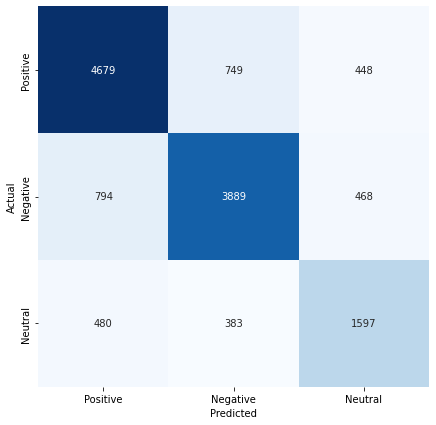

Classification Report 
               precision    recall  f1-score   support

    Positive       0.79      0.80      0.79      5876
    Negative       0.77      0.75      0.76      5151
     Neutral       0.64      0.65      0.64      2460

    accuracy                           0.75     13487
   macro avg       0.73      0.73      0.73     13487
weighted avg       0.75      0.75      0.75     13487



In [48]:
cm = confusion_matrix(y_test, y_pred, labels = [0,1,2])
clr = classification_report(y_test, y_pred,labels = [0,1,2], target_names = ['Positive', 'Negative', 'Neutral'])
plt.figure(figsize = (7,7))
sns.heatmap(cm, annot = True, fmt = 'g', cbar = False, cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks = [0.5, 1.5, 2.5],labels = ['Positive', 'Negative', 'Neutral'])
plt.yticks(ticks = [0.5, 1.5, 2.5],labels = ['Positive', 'Negative', 'Neutral'])
plt.show()
print('Classification Report \n', clr)